In [0]:
print("CPU Status:")
!cat /proc/cpuinfo | grep model\ name # 檢查CPU資訊

print("\nDisk Status:")
!df -lh # 檢查磁碟空間

print("\nRAM Status:")
!free -h #檢查記憶體大小

print("\nGPU Status:")
import tensorflow as tf
tf.test.gpu_device_name() #檢查GPU是否啟動，若無啟動則會自動改由CPU執行

CPU Status:
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz

Disk Status:
Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   28G  313G   9% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       365G   38G  328G  11% /opt/bin
shm             6.0G   16K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware

RAM Status:
              total        used        free      shared  buff/cache   available
Mem:            12G        5.8G        3.0G        276M        3.8G        8.3G
Swap:            0B          0B          0B

GPU Status:


'/device:GPU:0'

In [0]:
# 將Google雲端硬碟上的資料集複製到虛擬機上/tmp路徑下
# 若取得的檔案共用連結為https://drive.google.com/open?id=XXXXXXXXXXXXXX
!wget --no-check-certificate \
    "https://drive.google.com/uc?export=download&id=1kdv7SSu_KG_mVtx8O5LA3rRmRRiN87L4" \
    -O /tmp/spoon_and_forky.zip

import os
import zipfile

# 將下載到的資料集解壓縮至/tmp
local_zip = '/tmp/spoon_and_forky.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# 取得資料集路徑
base_dir = '/tmp/spoon_and_forky'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_spoony_dir = os.path.join(train_dir, 'spoony')           # 取得訓練用湯匙圖片的路徑
train_forky_dir = os.path.join(train_dir, 'forky')           # 取得訓練用叉子圖片的路徑
validation_spoony_dir = os.path.join(validation_dir, 'spoony') # 取得驗證用湯匙圖片的路徑
validation_forky_dir = os.path.join(validation_dir, 'forky') # 取得驗證用叉子圖片的路徑

train_spoony_fnames = os.listdir(train_spoony_dir)              # 取得訓練用所有湯匙圖片
train_forky_fnames = os.listdir(train_forky_dir)              # 取得訓練用所有叉子圖片
validation_spoony_fnames = os.listdir(validation_spoony_dir)    # 取得驗證用所有湯匙圖片
validation_forky_fnames = os.listdir(validation_forky_dir)    # 取得驗證用所有叉子圖片

--2019-06-15 15:45:03--  https://drive.google.com/uc?export=download&id=1kdv7SSu_KG_mVtx8O5LA3rRmRRiN87L4
Resolving drive.google.com (drive.google.com)... 64.233.189.102, 64.233.189.100, 64.233.189.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s4i16231f37e2v34d3ioog49hqo9bn9m/1560607200000/18400093308915039314/*/1kdv7SSu_KG_mVtx8O5LA3rRmRRiN87L4?e=download [following]
--2019-06-15 15:45:07--  https://doc-00-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s4i16231f37e2v34d3ioog49hqo9bn9m/1560607200000/18400093308915039314/*/1kdv7SSu_KG_mVtx8O5LA3rRmRRiN87L4?e=download
Resolving doc-00-5o-docs.googleusercontent.com (doc-00-5o-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-00-5o-docs.googleusercontent.com (doc-00

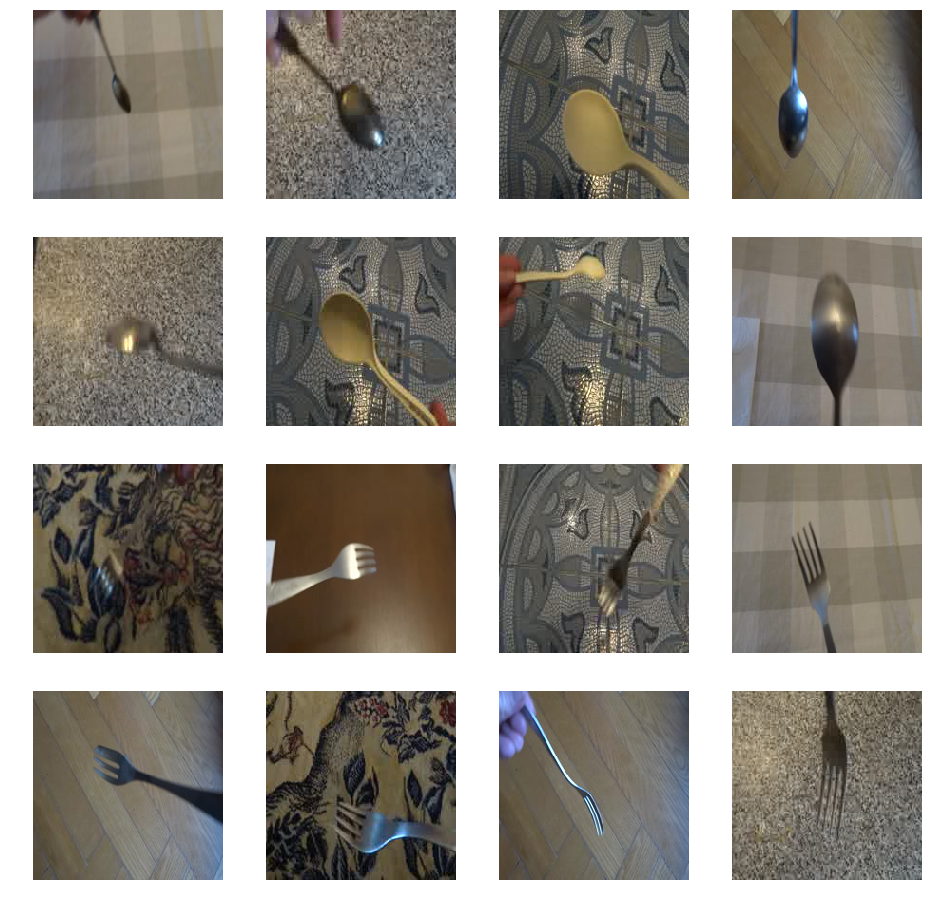

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 設定顯示列數(row)及行數(col)皆為4
nrows = 4
ncols = 4

# 圖像索引編號
pic_index = 0

# 設定繪圖參數使其可容納4x4張圖像
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# 設定下一次顯示圖像內容，叉子湯匙各8張
pic_index += 8
next_spoony_pix = [os.path.join(train_spoony_dir, fname) 
                for fname in train_spoony_fnames[pic_index-8:pic_index]]
next_forky_pix = [os.path.join(train_forky_dir, fname) 
                for fname in train_forky_fnames[pic_index-8:pic_index]]

# 將取得圖像內容繪製至容器中
for i, img_path in enumerate(next_spoony_pix+next_forky_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # 取消軸標示及格線

  img = mpimg.imread(img_path)
  plt.imshow(img)

# 顯示結果
plt.show()

In [0]:
import tensorflow as tf

from keras.models import Model
from keras import layers 
from keras import backend as K
from keras.layers.normalization import BatchNormalization

# Configure the TF backend session
tf_config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(allow_growth=True))
K.set_session(tf.Session(config=tf_config))

# 如同範例使用150*150*3的輸入圖片
img_input = layers.Input(shape=(150, 150, 3))

# CONV->RELU->POOL
# 第一層 convolution 使用32個3*3的filters並搭配RELU激活
# 批標準化以統一數據規格
# 以3*3的MaxPooling縮小圖片
# 使用dropout在相同資料下避免overfitting
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Dropout(0.25)(x)


# (CONV=>RELU)*2 ->POOL
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.25)(x)

# (CONV=>RELU)*2 ->POOL
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.25)(x)



x = layers.Flatten()(x)


x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

# 展示模型結構及各層所需訓練參數
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_43 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_44 (Batc (None, 47, 47, 64)        256       
__________

In [0]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2960 images belonging to 2 classes.
Found 393 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
 - 12s - loss: 0.9051 - acc: 0.6725 - val_loss: 4.2583 - val_acc: 0.3540
Epoch 2/15
 - 8s - loss: 0.5972 - acc: 0.7685 - val_loss: 2.6670 - val_acc: 0.5700
Epoch 3/15
 - 8s - loss: 0.4498 - acc: 0.8250 - val_loss: 2.9179 - val_acc: 0.5862
Epoch 4/15
 - 8s - loss: 0.3071 - acc: 0.8820 - val_loss: 4.6225 - val_acc: 0.5935
Epoch 5/15
 - 8s - loss: 0.2764 - acc: 0.8930 - val_loss: 4.1695 - val_acc: 0.6004
Epoch 6/15
 - 8s - loss: 0.2184 - acc: 0.9155 - val_loss: 3.1355 - val_acc: 0.3973
Epoch 7/15
 - 8s - loss: 0.1653 - acc: 0.9350 - val_loss: 2.3442 - val_acc: 0.5467
Epoch 8/15
 - 8s - loss: 0.1595 - acc: 0.9385 - val_loss: 1.6466 - val_acc: 0.5975
Epoch 9/15
 - 8s - loss: 0.1734 - acc: 0.9315 - val_loss: 1.4409 - val_acc: 0.6116
Epoch 10/15
 - 8s - loss: 0.1216 - acc: 0.9550 - val_loss: 2.2746 - val_acc: 0.6170
Epoch 11/15
 - 8s - loss: 0.1199 - acc: 0.9500 - val_loss: 3.8501 - val_acc: 0.5294
Epoch 12/15
 - 8s - loss: 0.1216 - acc: 0.9510 - val_loss: 2.7260 - val_acc: 0.5383


Text(0.5, 1.0, 'Training and validation loss')

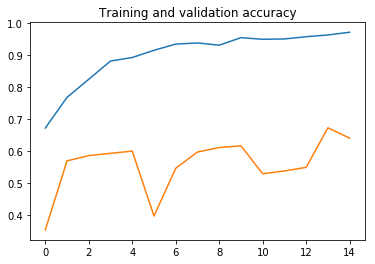

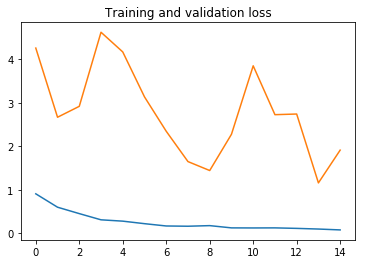

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Result = 0.999987
Test time :0.006035 second.
This is a spoon.


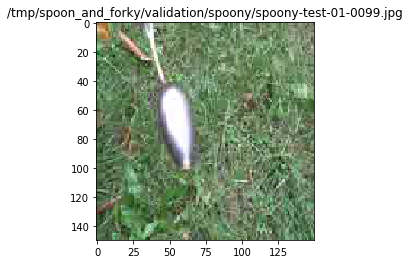

In [111]:
import numpy as np
import random
from keras.preprocessing.image import img_to_array, load_img

# Let's prepare a random input image of a cat or dog from the validation set.
spoony_img_files = [os.path.join(validation_spoony_dir, f) for f in validation_spoony_fnames]
forky_img_files = [os.path.join(validation_forky_dir, f) for f in validation_forky_fnames]
img_path = random.choice(spoony_img_files + forky_img_files)

# 讀入待測試圖像並秀出
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
plt.title(img_path)
plt.grid(False)
plt.imshow(img)

# 將圖像轉成模型可分析格式(150x150x3, float32)
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
x /= 255 # Rescale by 1/255

import time
start = time.time() # 啟動計時器

result = model.predict(x) # 對輸入圖像進行推論(預測)

finish = time.time() # 結束計時器

print ("Result = %f" %result) # 印出結果可能機率值(0.0 ~ 1.0)
print("Test time :%f second." %(finish-start)) # 印出推論時間

#設定分類門檻值並印出推論結果
spoon_threshold = 0.6
mid_threshold = 0.4
forky_threshold = 0.2

if result > spoon_threshold:    # result 介於0.6 至 1.0 為湯匙
    print("This is a spoon.") 
elif result >= mid_threshold: # result 介於0.4 至 0.6 可能為湯匙
    print("Maybe is a spoon")
elif result < forky_threshold:  # result 介於0.2 至 0.4 可能為叉子
    print("This is forky")
else:                         # result 介於0.0 至 0.2 為叉子
    print("Maybe is a forky.")

In [0]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)